# Exercises on Discovery

These exercises are from the book "A Primer on Process Mining", by Diogo Ferreira.


  Using cached https://files.pythonhosted.org/packages/7e/b1/d6d849ddaf6f11036f9980d433f383d4c13d1ebcfc3cd09bc845bda7e433/pygraphviz-1.5.zip
  Running setup.py bdist_wheel for pygraphviz ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/65/54/69/1aee9e66ab19916293208d4c9de0d3898adebe6b2eeff6476b
Successfully built pygraphviz


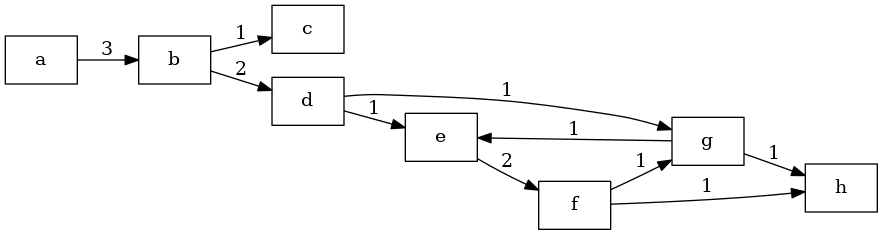

In [1]:
# Exercises from "A Primer on Process Mining", by Diogo Ferreira

# ==============================================================================
# define the log

f = """1;a;u1;2016-04-09 17:36:47
1;b;u3;2016-04-11 09:11:13
1;d;u6;2016-04-12 10:00:12
1;e;u7;2016-04-12 18:21:32
1;f;u8;2016-04-13 13:27:41
2;a;u2;2016-04-14 08:56:09
2;b;u3;2016-04-14 09:36:02
2;d;u5;2016-04-15 10:16:40
1;g;u6;2016-04-18 19:14:14
2;g;u6;2016-04-19 15:39:15
1;h;u2;2016-04-19 16:48:16
2;e;u7;2016-04-20 14:39:45
2;f;u8;2016-04-22 09:16:16
3;a;u2;2016-04-25 08:39:24
2;h;u1;2016-04-26 12:19:46
3;b;u4;2016-04-29 10:56:14
3;c;u1;2016-04-30 15:41:22"""


# ==============================================================================
# load the log as dictionary
log = []

log = dict()

for line in f.splitlines():
    line = line.strip()
    if len(line) == 0:
        continue
    parts = line.split(';')
    caseid = parts[0]
    task = parts[1]
    user = parts[2]
    timestamp = parts[3]
    if caseid not in log:
        log[caseid] = []
    event = (task, user, timestamp)
    log[caseid].append(event)

# ==============================================================================
# construct the dependency

F = dict()
for caseid in log:
    for i in range(0, len(log[caseid])-1):
      ai = log[caseid][i][0]
        aj = log[caseid][i+1][0]
        if ai not in F:
            F[ai] = dict()
        if aj not in F[ai]:
            F[ai][aj] = 0
        F[ai][aj] += 1

#for ai in sorted(F.keys()):
#    for aj in sorted(F[ai].keys()):
#        print ai, '->', aj, ':', F[ai][aj]


!apt-get -qq install -y graphviz libgraphviz-dev pkg-config && pip install pygraphviz;

import pygraphviz as pgv
from IPython.display import Image


# ==============================================================================
# generate the graphical output

G = pgv.AGraph(strict=False, directed=True)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'box'

for ai in F:
    for aj in F[ai]:
        G.add_edge(ai, aj, label=F[ai][aj])

G.draw('graph.png', prog='dot')
Image(filename="graph.png")
